## 06.

### Gate potential
* Let us assume that VG=0V
  - However, the electrostatic potential is ***<U>NOT</U>*** 0V at that point.
  - For the gate metal, the workfunction is known. The workfunction is the energy difference between the vacuum level and the Fermi level.
  - Therefore, when the workfunctin is 4.3V, the vacuum level is located at4.3eV, because the Fermi level is the energy reference.
  - Moreover, the energy difference between the vacuum level and the intrinsic Fermi level of silicon is given.(About 4.63eV)
  - Then, the intrinsic Fermi level of silicon is located at -0.33eV.
  - Finally, the electrostatic potential is 0.33V.
### Double-Gate MOS revisted
* Now apply the realistic boundary condition.
  - When the gate metal whose workfunctin is 4.3eV, the boundary value of the electrostatic potential is <span style="color:red">0.33374V</span>.
  - Solve the same problem. Neglect the carrier densities.
  - The gate voltage varies from 0V to 1V.
### Results at VG=0V and 1V
* Can you find something wrong?
  - Depletion approximation?
### Electron density(1)
* Effective density-of-states of the conduction band, NC
  - For example, NC of silicon at 300K is about 2.86e19cm-3.
* Electron density
  - Assume the Boltzmann statistics
  - At equilibrium, the electron density can be obtained by
    $$n(r)=N_C exp \left(\frac{E_F-E_C}{k_BT} \right) $$
    $E_F$: Fermi level
    $E_C$: Conductin band minimum
    $k_B$: Boltzmann constant
    $T$: Temperature
  - At 300K, $k_BT \approx 25.85meV$
### Electron density(2)
* Remember that $E_F=0$. Then
  $$n(r)=N_C exp \left(\frac{0-E_C}{k_BT} \right) $$
  - Also, the energy difference between $E_C$ and $E_i$ is a given constant.
    $$n(r)=N_C exp \left(\frac{-E_C}{k_BT} \right) = N_C exp \left(-\frac{E_C-E_i+E_i}{k_BT} \right)$$
  - Using $E_i=-q\phi$, we can obtain
    $$n(r) = N_C exp \left(-\frac{E_C-E_i}{k_BT} \right) exp\left(\frac{q\phi}{k_BT} \right) = n_i exp \left(\frac{q\phi}{k_BT} \right) = n_i exp\left(\frac{\phi}{V_T} \right)$$
### Python
* Step-by-step producre
* First, set up the strucutre
* Next, set the matrix, A.(Five cases)
* The vector, b, has the correct boundary values.
* Get the solution, $\phi$
* Using phi, the electron density is estimated.
* Plot it.
* Graph with $N_{acc}=1e18cm^{-3}$
### Problem
* Write your own code for the double-gate structure, whose oxide thickness is 0.8nm.
* The electrostatic potential is obtatined under the depletion approximation.
* (The initial potential) The electron density is calculated by assuming $n_i exp \left(\frac{q\phi}{k_BT} \right)$.
* Then, using the electron density, re-calculate the potential. (The updated potential)
* Check their difference for several gate voltages from 0V to 1V. (The voltage step is 0.1V. 11 points in total.)

### Numerical
$$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx}\phi(x) \right]=b(x)$$
$$\epsilon(x)=
\begin{cases}
\epsilon_1 &, 0 \le x < t1 \\
\epsilon_2 &, t1 \le x < t1+t2 \\
\epsilon_1 &, t1+t2 \le x < a
\end{cases}
$$
* When we take the depletion approximation
$$b(x)=
\begin{cases}
\phi_0 &, x=0 \\
0 &, 0 < x < t1 \\
qN_{acc} &, t1 \le x < t1+t2 \\
0 &, t1+t2 < x < a \\
\phi_0 &, x=a
\end{cases}
$$
$$\phi(0)=\phi(a)=0 $$
* If we add an electron(hole) density to the $b(x)$ of the depletion approximation
$$b(x)= 
\begin{cases}
\phi_0+V_g &, x=0 \\
0 &, 0 < x < t1 \\
qN_{acc}+q(n(x)-p(x)) &, t1 \le x < t1+t2 \\
0 &, t1+t2 < x < a \\
\phi_0+V_g &, x=a
\end{cases}
$$
* Where $V_a$ is a gate voltage, $n(x), p(x)$ is an electron, hole density
$$n(x) = N_C exp \left(-\frac{E_C-E_i}{k_BT} \right) exp\left(\frac{q\phi}{k_BT} \right)$$
$$p(x) = N_C exp \left(-\frac{E_C-E_i}{k_BT} \right) exp\left(-\frac{q\phi}{k_BT} \right)$$
$$q(n(x)-p(x)) = 2qN_C exp^{-\frac{E_C-E_i}{k_BT}}sinh\left(\frac{q\phi}{k_BT} \right) $$
$$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx}\phi(x) \right]=-\rho(x), \quad \rho(x)=q(p(x)-n(x)-N_{acc})$$
$$n(r) = N_C exp \left(-\frac{E_C-E_i}{k_BT} \right) exp\left(\frac{q\phi}{k_BT} \right) = n_i exp \left(\frac{q\phi}{k_BT} \right) = n_i exp\left(\frac{\phi}{V_T} \right)$$

* By the finite difference
$$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx} \right] \rightarrow A$$

$$\phi_0=0.33374V$$
$$b(x)=(\Delta x)^2
\begin{bmatrix}
\phi_0+V_g \\ 0 \\ \cdots \\ \frac{qN_{acc}}{2\epsilon_0}+q(n(x)-p(x)) \\ \frac{qN_{acc}}{\epsilon_0}+q(n(x)-p(x)) \\ \cdots \\ \frac{qN_{acc}}{\epsilon_0}+q(n(x)-p(x)) \\ \frac{qN_{acc}}{2\epsilon_0}+q(n(x)-p(x)) \\ \cdots \\ 0 \\ \phi_0+V_g
\end{bmatrix}
$$

$$\phi(x)
\begin{bmatrix}
\phi_1 \\ \cdots \\ \phi_N
\end{bmatrix}
$$
#### Algorithm
1. Initial $\phi(x)$ depletion approximation으로 $\phi(x)$ 구함
2. $\phi(x)$로 $n(x),p(x)$ 구함
3. $\frac{d}{dx}\left(\epsilon\frac{d}{dx}\phi(x) \right)=qn(x)-qp(x)+qN_{acc}$로 다시 $\phi(x)$ 구함
4. Termination condition, $|\phi_{new}-\phi_{old}|<Error$ 검증

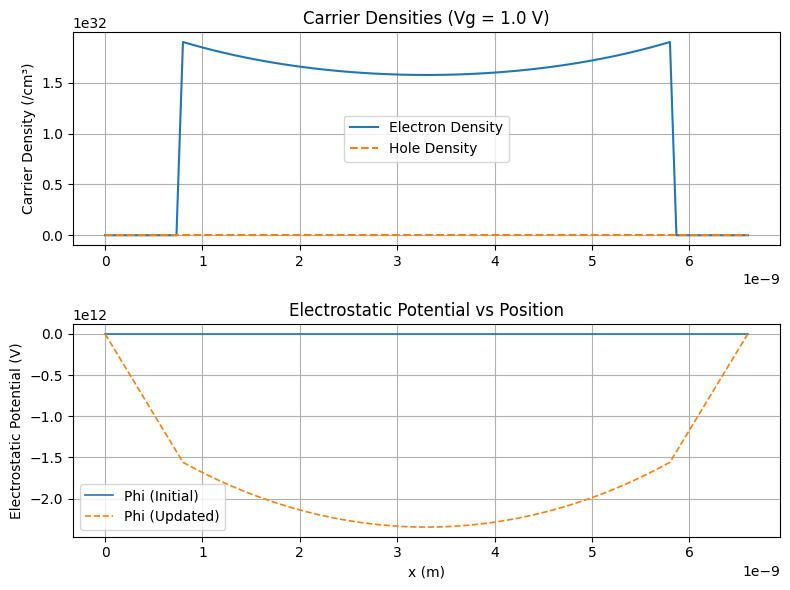

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.602e-19
width = 5e-9
tox = 0.8e-9
N = 100
dx = (width + 2 * tox) / (N - 1)
interface1 = round(tox / dx)
interface2 = round((tox + width) / dx)
Na = 1e24
e_si = 11.7
e_ox = 3.9
e0 = 8.854e-12
coeff = dx * dx * q / e0
nint = 1.075e16
T = 300
k_B = 1.380662e-23
thermal = k_B * T / q

# Arrays
eDensity = np.zeros((N, 11))
hDensity = np.zeros((N, 11))
phi = np.zeros((N, 11))
phi_update = np.zeros((N, 11))

# Matrix builder function
def build_matrix(N, interface1, interface2, e_si, e_ox, coeff, Na, eDensity_col, Vg):
    A = np.zeros((N, N))
    b = np.zeros(N)
    
    for ii in range(N):
        if ii == 0 or ii == N - 1:
            A[ii, ii] = 1
            b[ii] = 0.33374 + Vg
        elif interface1 < ii < interface2:
            A[ii, ii - 1] = e_si
            A[ii, ii] = -2 * e_si
            A[ii, ii + 1] = e_si
            b[ii] = coeff * (Na + eDensity_col[ii])
        elif ii < interface1 or ii > interface2:
            A[ii, ii - 1] = e_ox
            A[ii, ii] = -2 * e_ox
            A[ii, ii + 1] = e_ox
            b[ii] = 0
        elif ii == interface1:
            A[ii, ii - 1] = e_ox
            A[ii, ii] = -e_ox - e_si
            A[ii, ii + 1] = e_si
            b[ii] = coeff * (Na + eDensity_col[ii]) / 2
        elif ii == interface2:
            A[ii, ii - 1] = e_si
            A[ii, ii] = -e_ox - e_si
            A[ii, ii + 1] = e_ox
            b[ii] = coeff * (Na + eDensity_col[ii]) / 2

    return A, b

# Main simulation loop
for iVg in range(11):
    Vg = iVg * 0.1
    eDensity_col = np.zeros(N)
    A, b = build_matrix(N, interface1, interface2, e_si, e_ox, coeff, Na, eDensity_col, Vg)
    phi[:, iVg] = np.linalg.solve(A, b)

    for ii in range(N):
        if interface1 <= ii <= interface2:
            eDensity[ii, iVg] = nint * np.exp(+phi[ii, iVg] / thermal)
            hDensity[ii, iVg] = nint * np.exp(-phi[ii, iVg] / thermal)

    A, b = build_matrix(N, interface1, interface2, e_si, e_ox, coeff, Na, eDensity[:, iVg], Vg)
    phi_update[:, iVg] = np.linalg.solve(A, b)

# Convert to cm^-3
eDensity /= 1e6
hDensity /= 1e6

x = np.linspace(0, width + 2 * tox, N)

# Plot Electron and Hole Densities
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(x, eDensity[:, -1], label='Electron Density') # 모든 행, 마지막 열, Python에서는 인덱스 -1이 마지막을 뜻해요.
plt.plot(x, hDensity[:, -1], '--', label='Hole Density')
plt.ylabel('Carrier Density (/cm³)')
plt.title('Carrier Densities (Vg = 1.0 V)')
plt.grid(True)
plt.legend()

# Plot Phi
plt.subplot(2, 1, 2)
plt.plot(x, phi[:, -1], label='Phi (Initial)', linewidth=1.2)
plt.plot(x, phi_update[:, -1], '--', label='Phi (Updated)', linewidth=1.2)
plt.xlabel('x (m)')
plt.ylabel('Electrostatic Potential (V)')
plt.title('Electrostatic Potential vs Position')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


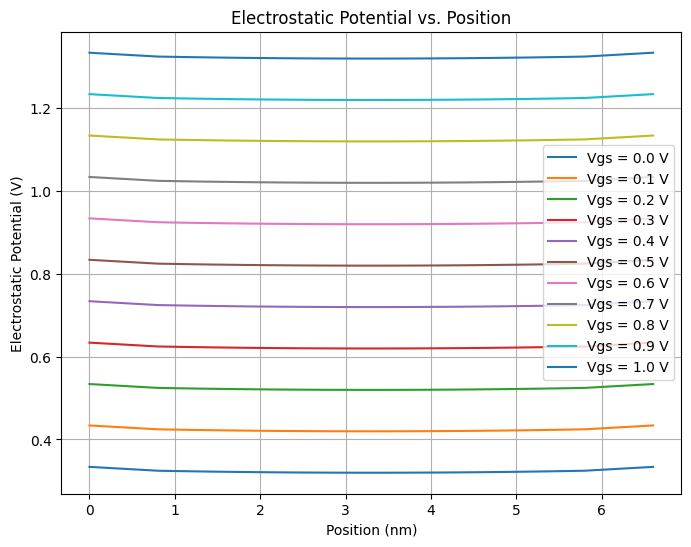

In [50]:
# Potential (처음 계산한 전위):
# np.linalg.solve(A, b)를 이용해서 도핑 분포만 고려한 전위 분포를 계산합니다.
# 이때 전자나 정공 밀도는 무시된 상태입니다.
# 즉, 고정된 전하만 고려한 초기 전위입니다.

# Updated Potential (업데이트된 전위):
# 전위로부터 **전자 밀도 (혹은 정공 밀도)**를 계산하고,
# 그 전하를 다시 전위 계산에 반영해서 전위(phi)를 업데이트한 것입니다.
# 즉, 자유 캐리어 (전자, 정공)까지 고려한 보다 정확한 전위 분포입니다.

import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.602e-19
width = 5e-9
tox = 0.8e-9
N = 67
dx = (width + 2 * tox) / (N - 1)
interface1 = round(tox / dx)
interface2 = round((tox + width) / dx)
Na = 1e24
e_si = 11.7
e_ox = 3.9
e0 = 8.854e-12
coeff = dx * dx * q / e0
nint = 1.075e16
T = 300
k_B = 1.380662e-23
thermal = k_B * T / q

# Arrays
phi = np.zeros((N, 11))  # Store phi for different gate voltages

# Matrix builder function
def build_matrix(N, interface1, interface2, e_si, e_ox, coeff, Na, eDensity_col, Vg):
    A = np.zeros((N, N))
    b = np.zeros(N)

    for ii in range(N):
        if ii == 0 or ii == N - 1:
            A[ii, ii] = 1
            b[ii] = 0.33374 + Vg  # Boundary condition
        elif interface1 < ii < interface2:
            A[ii, ii - 1] = e_si
            A[ii, ii] = -2 * e_si
            A[ii, ii + 1] = e_si
            b[ii] = coeff * (Na + eDensity_col[ii])
        elif ii < interface1 or ii > interface2:
            A[ii, ii - 1] = e_ox
            A[ii, ii] = -2 * e_ox
            A[ii, ii + 1] = e_ox
            b[ii] = 0
        elif ii == interface1:
            A[ii, ii - 1] = e_ox
            A[ii, ii] = -e_ox - e_si
            A[ii, ii + 1] = e_si
            b[ii] = coeff * (Na + eDensity_col[ii]) / 2
        elif ii == interface2:
            A[ii, ii - 1] = e_si
            A[ii, ii] = -e_ox - e_si
            A[ii, ii + 1] = e_ox
            b[ii] = coeff * (Na + eDensity_col[ii]) / 2

    return A, b

# Main simulation loop for Vgs = 0V to 1V
for iVg in range(11):
    Vg = iVg * 0.1  # Gate voltage from 0V to 1V
    eDensity_col = np.zeros(N)  # Initialize carrier density

    # Solve initial electrostatic potential (without carriers)
    A, b = build_matrix(N, interface1, interface2, e_si, e_ox, coeff, Na, eDensity_col, Vg)
    phi[:, iVg] = np.linalg.solve(A, b)

# Position array (x-axis)
x = np.linspace(0, width + 2 * tox, N) * 1e9  # Convert to nm

# Plot electrostatic potential for different gate voltages
plt.figure(figsize=(8, 6))
for i in range(0, 11, 1):  # Plot every 0.2V step for clarity
    plt.plot(x, phi[:, i], label=f'Vgs = {i*0.1:.1f} V')

plt.xlabel('Position (nm)')
plt.ylabel('Electrostatic Potential (V)')
plt.title('Electrostatic Potential vs. Position')
plt.legend()
plt.grid(True)
plt.show()
